<a href="https://colab.research.google.com/github/AnwarMirza/SEP769-Cyber-Physical-Systems-McMaster-Summer2023/blob/main/03funcApproxTFnnCPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a Tensorflow Model

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
selectedFunction = 2
def myFunc(x):
  functions = {
      1: np.power(x,2), # quadratic function
      2: np.sin(x),     # sinusoidal function
      3: 1.0 / ( np.power(x-0.3, 2) + 0.01) + 1.0 / ( np.power(x - 0.9,2) + 0.04) - 6.0
  }
  return (functions.get(selectedFunction))

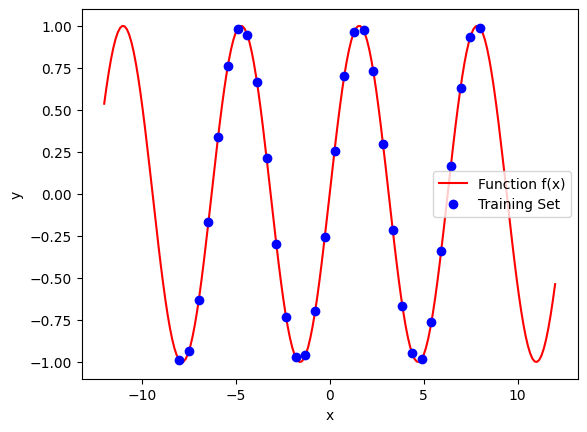

In [ ]:
# Generate training dataset
batchSize = 32 # length of the training vector
if selectedFunction ==  2:
  xtrain = tf.expand_dims(tf.linspace(-8.0, 8.0, batchSize), axis = 1)
  x = tf.expand_dims(tf.linspace(-12.0, 12.0, 200), axis = 1)
else:
  xtrain = tf.expand_dims(tf.linspace(0.0, 1.0, batchSize), axis = 1)
  x = tf.expand_dims(tf.linspace(0.0, 1.0, 200), axis = 1)
ytrain = myFunc(xtrain)

y = myFunc(x)

plt.plot(x, y, '-r', label='Function f(x)')
plt.plot(xtrain, ytrain, 'bo', label='Training Set')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

learningRate = 0.0001
mu = 0.0
numOfEpochs = 10000

In [ ]:
# create
nnModel = tf.keras.models.Sequential()

# add a hidden layer
#.    A dense layer means that all neurons in this layer are
#.    connected with all the neurons in the previous layer.
#.    It is customary to use a power of 2 as number of neurons.
nnModel.add(tf.keras.layers.Dense(16, input_dim=xtrain.shape[1], activation='tanh'))

# add the output layer
nnModel.add(tf.keras.layers.Dense(1, activation='linear'))

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.5)
nnModel.compile(optimizer=opt, loss='mse', metrics='mse')

In [ ]:
numOfEpochs = 3000
history = nnModel.fit(xtrain, ytrain, epochs=numOfEpochs, verbose=0)

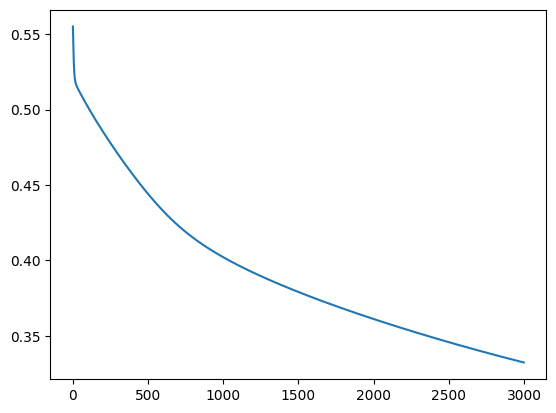

In [ ]:
plt.plot(history.history['loss'])

4/4 [==============================] - 0s 3ms/step


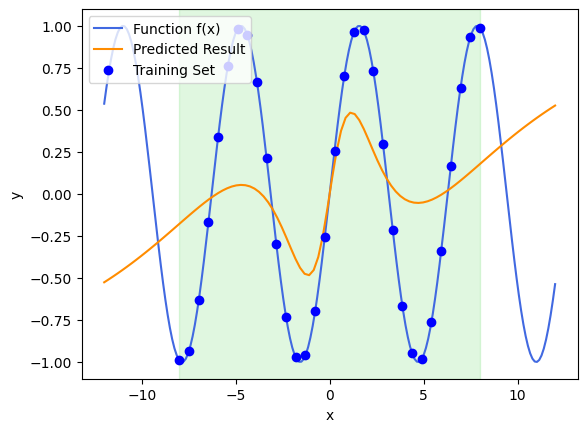

In [ ]:
# Generate test dataset
batchSize = 100 # length of the training vector
if selectedFunction ==  2:
  xtest = tf.expand_dims(tf.linspace(-12.0, 12.0, batchSize), axis = 1)
  plt.axvspan(-8, 8, alpha=0.15, color='limegreen')
else:
  xtest = tf.expand_dims(tf.linspace(-1.5, 1.5, batchSize), axis = 1)
  plt.axvspan(0, 1, alpha=0.15, color='limegreen')
ytest = nnModel.predict(xtest)


plt.plot(x, y, color='royalblue', label='Function f(x)')
plt.plot(xtest, ytest, color='darkorange', label='Predicted Result')
plt.plot(xtrain, ytrain, 'bo', label='Training Set')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


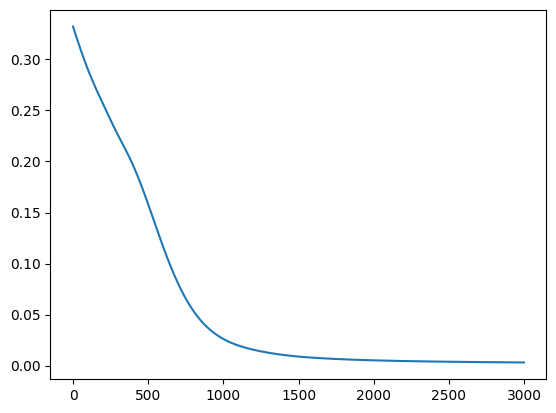

In [ ]:
nnModel2 = nnModel
numOfEpochs = 3000
nnModel2.compile(optimizer='adam', loss='mse', metrics='mse')
history2 = nnModel2.fit(xtrain, ytrain, epochs=numOfEpochs, verbose=0)
plt.plot(history2.history['loss'])



4/4 [==============================] - 0s 3ms/step


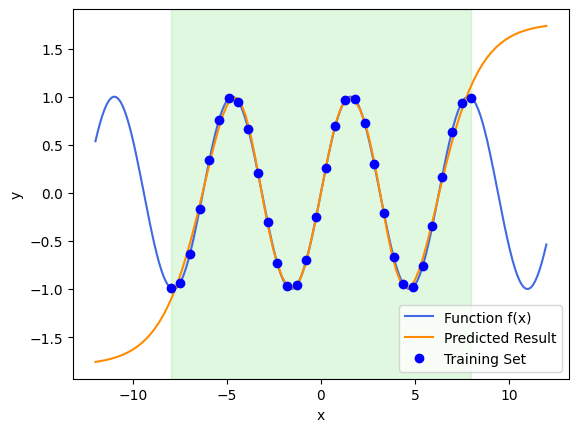

In [ ]:

# Generate test dataset
batchSize = 100 # length of the training vector
if selectedFunction ==  2:
  xtest2 = tf.expand_dims(tf.linspace(-12.0, 12.0, batchSize), axis = 1)
  plt.axvspan(-8, 8, alpha=0.15, color='limegreen')
else:
  xtest2 = tf.expand_dims(tf.linspace(-1.5, 1.5, batchSize), axis = 1)
  plt.axvspan(0, 1, alpha=0.15, color='limegreen')
ytest2 = nnModel2.predict(xtest2)


plt.plot(x, y, color='royalblue', label='Function f(x)')
plt.plot(xtest2, ytest2, color='darkorange', label='Predicted Result')
plt.plot(xtrain, ytrain, 'bo', label='Training Set')
plt.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

